In [212]:
import cycler
import matplotlib.pyplot as plt
import numpy as np


In [207]:
import cycler

In [188]:
K = np.arange(1, 50)
inv = 1. / K
zeroshot_pw = -inv*np.log(inv)-(1-inv)*np.log(1-inv)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5,1,'Task Info for Random-DOI, D->+oo')

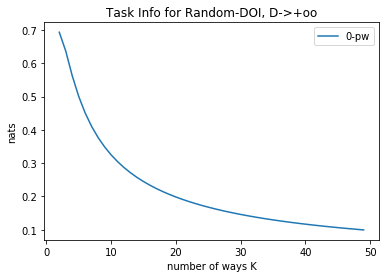

In [189]:
plt.plot(K, zeroshot_pw, label='0-pw')
#plt.semilogx(K, inv, label='0-pw')
plt.legend()
plt.xlabel('number of ways K')
plt.ylabel('nats')
plt.title('Task Info for Random-DOI, D->+oo')

In [190]:
def binary_entropy(p):
    mask = (p<=0)|(p>=1)
    ent = -p*np.log(p) - (1-p)*np.log(1-p)
    ent[mask] = 0
    return ent / np.log(2)

def stats(x):
    assert len(x.shape)==1
    return np.mean(x), np.std(x) / np.sqrt(len(x))

n_samples = 10000
K = 5
D = 10
bernoullis = np.random.uniform(size=(D, n_samples)) < 1. / K
p_z_xx = 1. / D * np.sum(bernoullis, axis=0)

stats(binary_entropy(p_z_xx))

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


(0.6392655973560959, 0.002815684205672317)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less_equal
  
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater_equal
  


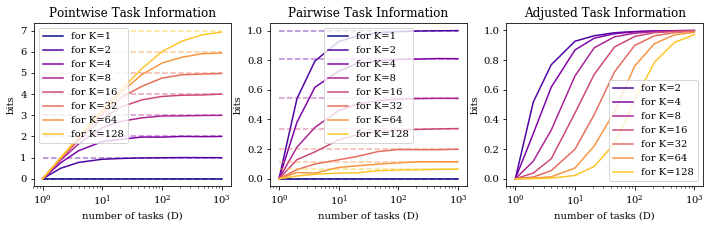

In [240]:
Ks = (1, 2, 4, 8, 16, 32, 64, 128)
Ds = map(int, np.logspace(0, 3, 10))
n_samples = 1000

n = len(Ks) + 1
color = plt.cm.plasma(np.linspace(0, 1,n))
matplotlib.rcParams['axes.prop_cycle'] = cycler.cycler('color', color)
plt.rc('font', family='serif')


plt.figure(figsize=(12,3))
ax = plt.subplot(131)
# unary predictions
for K in Ks:
    unary_labelnoise = []
    for D in Ds:
        bernoullis = np.random.uniform(size=(D-1, n_samples)) < 1. / K
        p_y_x = 1. / D * (1 + np.sum(bernoullis, axis=0))
        mean, std = stats(-np.log(p_y_x) / np.log(2))
        unary_labelnoise.append(mean)

    color = next(ax._get_lines.prop_cycler)['color']
    plt.semilogx(Ds, unary_labelnoise, label='for K={}'.format(K), color=color)
    # plot upper bound
    U = np.log(K) / np.log(2)
    upper = np.ones_like(Ds) * U
    plt.semilogx(Ds, upper, linestyle='--', color=color, alpha=0.5)
    
plt.legend()
plt.xlabel('number of tasks (D)')
plt.ylabel('bits')
plt.title('Pointwise Task Information')
                          
ax = plt.subplot(132)  
# pairwise
for K in Ks:
    pw_labelnoise = []
    for D in Ds:
        bernoullis = np.random.uniform(size=(D, n_samples)) < 1. / K

        # pairwise
        p_z_xx = 1. / D * np.sum(bernoullis, axis=0)
        mean, std = stats(binary_entropy(p_z_xx))
        
        pw_labelnoise.append(mean)
                          
    color = next(ax._get_lines.prop_cycler)['color']
    plt.semilogx(Ds, pw_labelnoise, label='for K={}'.format(K), color=color)
    # plot upper bound
    U = binary_entropy(np.asarray([1./K]))[0]
    upper = np.ones_like(Ds) * U
    plt.semilogx(Ds, upper, linestyle='--', color=color, alpha=0.5)
    
plt.legend()
plt.xlabel('number of tasks (D)')
plt.ylabel('bits')
plt.title('Pairwise Task Information')

ax = plt.subplot(133)  
# balanced-pairwise
for K in Ks:
    adj_labelnoise = []
    for D in Ds:
        bernoullis = np.random.uniform(size=(D, n_samples)) < 1. / K

        # pairwise
        p_z_xx = 1. / D * np.sum(bernoullis, axis=0)
        #q_z_xx = (K-1)*p_z_xx / ((K-1)*p_z_xx + 1 - p_z_xx)
        q_z_xx = (K-1)*p_z_xx / ((K-1)*p_z_xx + 1 - p_z_xx)
        mean, std = stats(binary_entropy(q_z_xx))
        
        adj_labelnoise.append(mean)
                          
    color = next(ax._get_lines.prop_cycler)['color']
    if K!=1:
        plt.semilogx(Ds, adj_labelnoise, label='for K={}'.format(K), color=color)
plt.legend()
plt.xlabel('number of tasks (D)')
plt.ylabel('bits')
plt.title('Adjusted Task Information')


plt.savefig('randomdoi_vs_kd.pdf', bbox_inches='tight')

In [237]:
matplotlib.rcParams['axes.prop_cycle']

"array([0.050383, 0.029803, 0.527975, 1. ])"
"array([0.299855, 0.009561, 0.631624, 1. ])"
"array([0.494877, 0.01199 , 0.657865, 1. ])"
"array([0.665129, 0.138566, 0.585582, 1. ])"
"array([0.798216, 0.280197, 0.469538, 1. ])"
"array([0.901807, 0.425087, 0.359688, 1. ])"
"array([0.973416, 0.585761, 0.25154 , 1. ])"
"array([0.993033, 0.77172 , 0.154808, 1. ])"
"array([0.940015, 0.975158, 0.131326, 1. ])"


In [198]:
np.asarray([1./K])

array([1.])